In [2]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [245]:
img = cv2.imread('./datasets/courtney cox/ia_100000001955.jpg')
img.shape

(600, 600, 3)

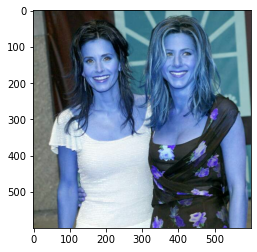

In [246]:
plt.imshow(img)

In [247]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(600, 600)

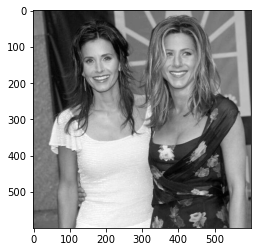

In [248]:
plt.imshow(gray, cmap='gray')

In [249]:
face_cascade = cv2.CascadeClassifier('./haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./haarcascades/haarcascade_eye.xml'
                                   )
nose_cascade=cv2.CascadeClassifier('./haarcascades/nose.xml')
mouth_cascade=cv2.CascadeClassifier('./haarcascades/Mouth.xml')

In [250]:
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
eyes=eye_cascade.detectMultiScale(gray, 1.3, 5)
nose=nose_cascade.detectMultiScale(gray, 1.3, 5)
mouth=mouth_cascade.detectMultiScale(gray, 1.3, 5)

In [251]:
faces

array([[337,  72, 125, 125],
       [119,  88, 128, 128]], dtype=int32)

In [252]:
eyes

array([[347,  97, 100,  46],
       [130, 113, 100,  46]], dtype=int32)

In [253]:
nose

array([[166, 159,  29,  18]], dtype=int32)

In [254]:
mouth

array([[174, 218,  30,  19],
       [368, 157,  63,  38],
       [157, 173,  60,  36]], dtype=int32)

In [255]:
(ex,ey,ew,eh)=eyes[0]

In [256]:
(nx,ny,nw,nh)=nose[0]

In [257]:
(mx,my,mw,mh)=mouth[0]

In [258]:
(x,y,w,h)=faces[0]

In [285]:
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(face_img,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
    for (nx,ny,nw,nh) in nose:
        cv2.rectangle(face_img,(nx,ny),(nx+nw,ny+nh),(0,0,255),2)
    for (mx,my,mw,mh) in mouth:
        cv2.rectangle(face_img,(mx,my),(mx+mw,my+mh),(255,255 ,0),2)
        

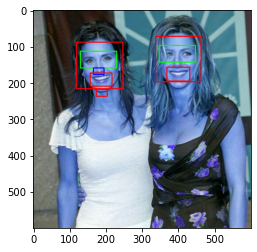

In [286]:
plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

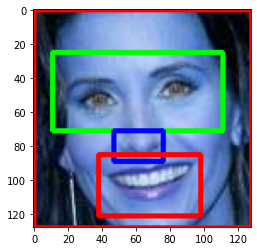

In [287]:
for (x,y,w,h) in faces:
    roi_color = img[y:y+h, x:x+w]
    %matplotlib inline
    plt.imshow(roi_color, cmap='gray')

In [288]:
cropped_img = np.array(roi_color)
cropped_img.shape

(128, 128, 3)

### Preprocessing: Use wavelet transform as a feature for traning our model
In wavelet transformed image, you can see edges clearly and that can give us clues on various facial features such as eyes, nose, lips etc

In [289]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

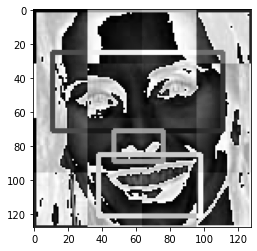

In [290]:

im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

### Preprocessing: Load image, detect face.

In [332]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    if(img is not None):
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, 1.3, 5)
        for (x,y,w,h) in faces:
            roi_gray = gray[y:y+h, x:x+w]
            roi_color = img[y:y+h, x:x+w]
            eyes = eye_cascade.detectMultiScale(roi_gray)
            if len(eyes) >= 1:
                return roi_color
    else:
        return None
       

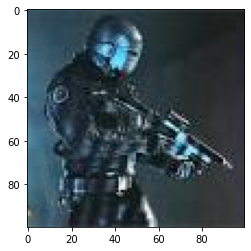

In [325]:
original_image = cv2.imread('./datasets/matt_leblanc/ia_300000050.jpg')
plt.imshow(original_image)

In [326]:
cropped_image = get_cropped_image_if_2_eyes('./datasets/matt_leblanc/ia_300000050.jpg')
cropped_image

# cropped directory

In [327]:
path_to_data = "./datasets/"
path_to_cr_data = "./datasets/cropped/"

In [328]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [329]:
img_dirs

['./datasets/courtney cox',
 './datasets/david schwimmer',
 './datasets/Jennifer Aniston',
 './datasets/lisa kudrow',
 './datasets/mathew perry',
 './datasets/matt_leblanc']

In [330]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [333]:
cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    celebrity_file_names_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

Generating cropped images in folder:  ./datasets/cropped/courtney cox
Generating cropped images in folder:  ./datasets/cropped/david schwimmer
Generating cropped images in folder:  ./datasets/cropped/Jennifer Aniston
Generating cropped images in folder:  ./datasets/cropped/lisa kudrow
Generating cropped images in folder:  ./datasets/cropped/mathew perry
Generating cropped images in folder:  ./datasets/cropped/matt_leblanc



Manually examine cropped folder and delete any unwanted images

In [334]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list

In [335]:
celebrity_file_names_dict

{'courtney cox': ['./datasets/cropped/courtney cox\\courtney cox1.png',
  './datasets/cropped/courtney cox\\courtney cox10.png',
  './datasets/cropped/courtney cox\\courtney cox11.png',
  './datasets/cropped/courtney cox\\courtney cox12.png',
  './datasets/cropped/courtney cox\\courtney cox13.png',
  './datasets/cropped/courtney cox\\courtney cox14.png',
  './datasets/cropped/courtney cox\\courtney cox17.png',
  './datasets/cropped/courtney cox\\courtney cox18.png',
  './datasets/cropped/courtney cox\\courtney cox19.png',
  './datasets/cropped/courtney cox\\courtney cox22.png',
  './datasets/cropped/courtney cox\\courtney cox24.png',
  './datasets/cropped/courtney cox\\courtney cox26.png',
  './datasets/cropped/courtney cox\\courtney cox28.png',
  './datasets/cropped/courtney cox\\courtney cox3.png',
  './datasets/cropped/courtney cox\\courtney cox30.png',
  './datasets/cropped/courtney cox\\courtney cox31.png',
  './datasets/cropped/courtney cox\\courtney cox32.png',
  './datasets/cro

In [336]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'courtney cox': 0,
 'david schwimmer': 1,
 'Jennifer Aniston': 2,
 'lisa kudrow': 3,
 'mathew perry': 4,
 'matt_leblanc': 5}

In [337]:
x, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        x.append(combined_img)
        y.append(class_dict[celebrity_name])

len(X[0]) = 4096 = 32 * 32 * 3 + 32*32

In [339]:
x = np.array(x).reshape(len(x),4096).astype(float)
x.shape

(355, 4096)

### model training

In [340]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [341]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [345]:
mod=SVC(kernel='rbf',C=10)
mod.fit(x_train,y_train)
mod.score(x_test,y_test)

0.7528089887640449

In [344]:
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(x_train, y_train)
pipe.score(x_test, y_test)

0.8314606741573034

In [347]:
print(classification_report(y_test, pipe.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      0.88      0.93        16
           1       0.86      0.60      0.71        10
           2       0.84      1.00      0.91        26
           3       0.83      0.88      0.86        17
           4       0.75      0.43      0.55         7
           5       0.67      0.77      0.71        13

    accuracy                           0.83        89
   macro avg       0.82      0.76      0.78        89
weighted avg       0.84      0.83      0.82        89



#### gridsearch 

In [348]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [349]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [351]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(x_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.774354,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.503704,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.781971,{'logisticregression__C': 5}


In [352]:
best_estimators['svm'].score(x_test,y_test)

0.8426966292134831

In [353]:
best_estimators['logistic_regression'].score(x_test,y_test)

0.8426966292134831

In [355]:
best_clf = best_estimators['logistic_regression']

In [356]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(x_test))


Text(69.0, 0.5, 'Truth')

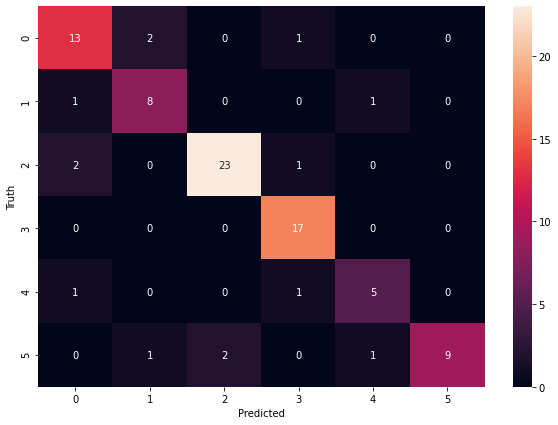

In [358]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [359]:
class_dict

{'courtney cox': 0,
 'david schwimmer': 1,
 'Jennifer Aniston': 2,
 'lisa kudrow': 3,
 'mathew perry': 4,
 'matt_leblanc': 5}

In [361]:
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model_img_class.pkl')

['saved_model_img_class.pkl']

In [362]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))